In [1]:
from astropy.table import Table
from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

In [2]:
lc_fits = Table.read('./toy_kHz_lightcurve.fits')
meta = lc_fits.meta
print(lc_fits.info())
print(meta)
dt = meta['DT']
n_bins = meta['N_BINS']
n_seg = meta['N_SEG']
n_seconds = meta['NSECONDS']
lc_fits

<Table length=32768>
name  dtype   shape   unit 
---- ------- ------- ------
 REF float64   (20,) ct / s
  CI float64 (5, 20) ct / s
None
OrderedDict([('N_BINS', 32768), ('DT', 0.00048828125), ('DETCHANS', 5), ('CHBIN', '/Users/abbie/Dropbox/Research/kHz_QPO_phase_res/toy_chbinfile.txt'), ('N_SEG', 20), ('NSECONDS', 16)])


REF [20],"CI [5,20]"
ct / s,ct / s
float64,float64
2048.0 .. 0.0,0.0 .. 0.0
2048.0 .. 4096.0,0.0 .. 0.0
0.0 .. 0.0,0.0 .. 0.0
6144.0 .. 0.0,0.0 .. 0.0
2048.0 .. 4096.0,0.0 .. 0.0
4096.0 .. 0.0,0.0 .. 0.0
6144.0 .. 4096.0,0.0 .. 0.0
2048.0 .. 2048.0,0.0 .. 0.0


In [3]:
# multiply by dt to get counts
ref = lc_fits['REF'] * dt
ci = lc_fits['CI'] * dt
print(ref.shape, ci.shape)

(32768, 20) (32768, 5, 20)


In [4]:
start = 0
stop = 1
# Taking 1 segment (for now)
counts = np.hstack(np.array(ref[:,start:stop]))
times = np.arange(0,n_seconds*(stop-start), dt)
print(len(times), len(counts))
print(times)
lc = Lightcurve(times, counts, dt=dt)
#lc.plot()
#lc_rebin = lc.rebin(dt*2)
#print("Old dt: ", lc.dt)
#print("New dt: ", lc_rebin.dt)
#lc_rebin.plot()

32768 32768
[0.00000000e+00 4.88281250e-04 9.76562500e-04 ... 1.59985352e+01
 1.59990234e+01 1.59995117e+01]


16383
[6.2500000e-02 1.2500000e-01 1.8750000e-01 ... 1.0238125e+03 1.0238750e+03
 1.0239375e+03]
[1.71031722 4.59395447 3.14830028 ... 0.26007613 4.09241832 3.13625741]
0.0625
1
32768
36453.0


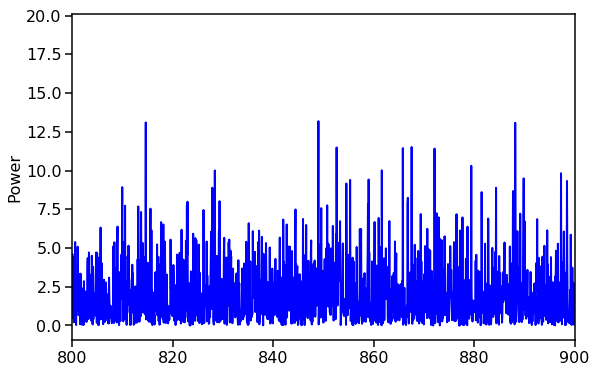

In [9]:
ps = Powerspectrum(lc, norm='leahy')

print(len(ps.freq))
print(ps.freq)
print(ps.power)
print(ps.df)
print(ps.m)
print(ps.n)
print(ps.nphots1)

fig, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1.plot(ps.freq, ps.power, lw=2, color='blue')
ax1.set_ylabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power", fontproperties=font_prop)
#ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlim(800,900)
plt.show()

In [14]:
start = 0
stop = lc_fits.meta['N_SEG'] # number of segments
counts = np.hstack(np.array(ref[:,start:stop]))
times = np.arange(0,n_seconds*(stop-start), dt)
big_lc = []
print(dt)
for i in range(lc_fits.meta['N_SEG']):
    big_lc.append(Lightcurve(times, ref[:,i], dt=dt))
avgps = AveragedPowerspectrum(big_lc, 16, norm='leahy')
print(avgps.n)
print(avgps.m)

0.00048828125


StingrayError: time and counts array are not of the same length!

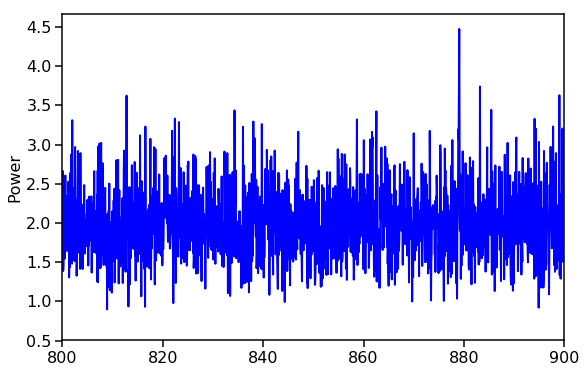

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1.plot(avgps.freq, avgps.power, lw=2, color='blue')
ax1.set_ylabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power", fontproperties=font_prop)
#ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlim(800,900)
plt.show()